In [1]:
import os
import pandas as pd
import re
import logging
import numpy as np

In [12]:
conf_matrix=pd.read_csv('Confusion_matrix_202002181935.csv',index_col=0,dtype={'num_jitters':np.str,'tolerance':np.str})
conf_matrix=conf_matrix.set_index(['num_jitters','tolerance','prediction'],drop=True,append=True)
conf_matrix

P      N
encoding_set              num_jitters tolerance prediction              
encoding/encoding3.pickle nj:1        tol:0.1   T             0.0  168.0
                                                F             0.0   36.0
                                      tol:0.2   T             0.0  168.0
                                                F             0.0   36.0
                                      tol:0.3   T             7.0  168.0
                                                F             0.0   29.0
                                      tol:0.4   T            27.0  154.0
                                                F            15.0    8.0
                                      tol:0.5   T            33.0   54.0
                                                F           117.0    0.0
                                      tol:0.6   T            32.0    1.0
                                                F           171.0    0.0
                                      tol:0.7   T            23.0    0.0
                                                F           181.0    0.0
                                      tol:0.8   T            11.0    0.0
                                                F           193.0    0.0
                                      tol:0.9   T             9.0    0.0
                                                F           195.0    0.0
                                      tol:1.0   T             9.0    0.0
                                                F           195.0    0.0

In [13]:
idx=pd.IndexSlice
all_li=[conf_matrix.loc[idx[:,:,[f'tol:{_/10}'],:],:].sum().sum() for _ in range(1,11)]
all_li

[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0]

In [30]:
Acc=[(conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()+conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'N'].values.item())/conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],:],:].sum().sum() for tol in range(1,11)]

Prec=[conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()/(conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()+conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'F'],'P'].values.item()) for tol in range(3,11)]

Rec=[conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()/(conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()+conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'F'],'N'].values.item()) for tol in range(1,11)]

F1=2*np.array(Prec)*np.array(Rec)/np.array(Rec)+np.array(Prec)

Minus_Spec=[conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'F'],'P'].values.item()/(conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'N'].values.item()+conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'F'],'P'].values.item()) for tol in range(1,11)]



print(f'Accuracy : {Acc}\n\nPrecision : {Prec}\n\nRecall : {Rec}\n\n1-Spec : {Minus_Spec}')

ValueError: operands could not be broadcast together with shapes (8,) (10,) 

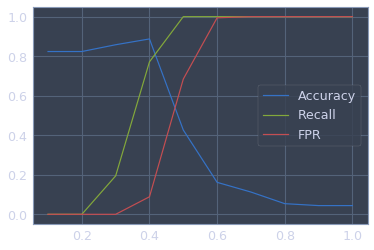

In [20]:
%matplotlib inline
# %matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
x=[i/10 for i in range(1,11)]
plt.plot(x, Acc,label='Accuracy')
plt.plot(x, Rec,label='Recall')
plt.plot(x, Minus_Spec,label='FPR')
plt.legend()

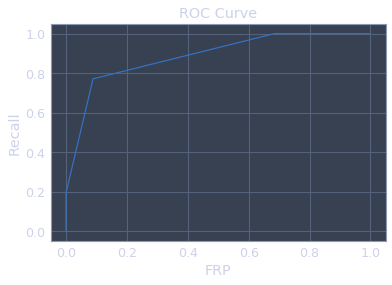

In [24]:
plt.plot(Minus_Spec,Rec)
plt.title("ROC Curve")
plt.xlabel("FRP")
plt.ylabel("Recall");

In [128]:
test_table=pd.read_csv('testSetTable.csv',index_col=0)
test_table

,filename,ywt,hao,ford,unknown,DOD
0,ford001.jpg,0,0,1,7,0
1,ford002.jpg,0,0,1,4,0
2,ford003.jpg,0,0,1,0,0
3,ford004.jpg,0,0,1,0,0
4,ford005.jpg,0,0,1,0,0
5,ford006.jpg,0,0,1,1,0
6,ford007.jpg,0,0,1,1,0
7,hao001.jpg,0,1,0,3,0
9,hao003.jpg,0,1,0,11,0
10,hao004.jpg,0,1,0,8,0


In [130]:
test_table.iloc[:,1:4].sum()

ywt     19
hao      8
ford     9
dtype: int64

In [129]:
print(f'total people : {test_table.iloc[:,1:5].sum().sum()}, labeled people : {test_table.iloc[:,1:4].sum().sum()}, unknown perple : {test_table.iloc[:,4].sum().sum()}')

total people : 204, labeled people : 36, unknown perple : 168


In [295]:
timing_log=pd.read_csv('timing_log.csv',index_col=0,dtype={'num_jitters':np.str,'tolerance':np.str})
timing_log=timing_log.set_index(['num_jitters','tolerance'],drop=True,append=True)
timing_log

loading  encoding  comparing  \
encoding_set              num_jitters tolerance                                 
encoding/encoding3.pickle 1           0.1            0.0       0.0        0.0   
                                      0.2            0.0       0.0        0.0   
                                      0.3            0.0       0.0        0.0   
                                      0.4            0.0       0.0        0.0   
                                      0.5            0.0       0.0        0.0   
                                      0.6            0.0       0.0        0.0   
                                      0.7            0.0       0.0        0.0   
                                      0.8            0.0       0.0        0.0   
                                      0.9            0.0       0.0        0.0   
                                      1.0            0.0       0.0        0.0   
                                      0.1            0.0       0.0        0.0   

                                                 total  
encoding_set              num_jitters tolerance         
encoding/encoding3.pickle 1           0.1          0.0  
                                      0.2          0.0  
                                      0.3          0.0  
                                      0.4          0.0  
                                      0.5          0.0  
                                      0.6          0.0  
                                      0.7          0.0  
                                      0.8          0.0  
                                      0.9          0.0  
                                      1.0          0.0  
                                      0.1          0.0

In [299]:
timing_log.loc[('encoding/encoding3.pickle','1','0.5'),'loading']=0.5
timing_log

/usr/local/lib/python3.6/dist-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


loading  encoding  comparing  \
encoding_set              num_jitters tolerance                                 
encoding/encoding3.pickle 1           0.1            0.0       0.0        0.0   
                                      0.2            0.0       0.0        0.0   
                                      0.3            0.0       0.0        0.0   
                                      0.4            0.0       0.0        0.0   
                                      0.5            0.5       0.0        0.0   
                                      0.6            0.0       0.0        0.0   
                                      0.7            0.0       0.0        0.0   
                                      0.8            0.0       0.0        0.0   
                                      0.9            0.0       0.0        0.0   
                                      1.0            0.0       0.0        0.0   
                                      0.1            0.0       0.0        0.0   

                                                 total  
encoding_set              num_jitters tolerance         
encoding/encoding3.pickle 1           0.1          0.0  
                                      0.2          0.0  
                                      0.3          0.0  
                                      0.4          0.0  
                                      0.5          0.0  
                                      0.6          0.0  
                                      0.7          0.0  
                                      0.8          0.0  
                                      0.9          0.0  
                                      1.0          0.0  
                                      0.1          0.0

In [274]:
tl=0.1
te=0.2
tc=0.05
tt=tl+te+tc
args={}
args["encodings"]='encoding/encoding3.pickle'
num_jitters=1
args["tolerance"]=0.1
over_write_timing_csv=False
while not over_write_timing_csv:
    try:
        tl_row=timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'loading']
        logging.debug(f'start over writing timing_log.csv\n')
        te_row=timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'encoding']
        tc_row=timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'comparing']
        tt_row=timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'total']

        tl_row=tl+tl_row
        te_row=te+te_row
        tc_row=tc+tc_row
        tt_row=tt+tt_row
        logging.debug(f'\n{timing_log}\n')
        timing_log.to_csv(os.path.dirname(os.path.abspath(__file__))+'/examples/exampleSet/timing_log.csv',index=True,header=True)
        logging.info('timing_log.csv has been over write')
        over_write_timing_csv=True
    except:
        logging.debug(f'revise timing_log.csv unassigned rows\n')
        timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'loading']=0
        timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'encoding']=0
        timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'comparing']=0
        timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'total']=0
        logging.debug(f'finish revise timing_log.csv unassigned rows\n')

KeyError: "['1' '0.1'] not in index"

In [34]:
def squqre_series(x):
    for _ in range(x):
        x=_**2
    yield x

b=squqre_series(8)
list(b)

[49]

In [39]:
def new_range(n):
    i = 0
    while i < n:
        i += 1
        yield i

b = new_range(10)
print(next(b))
print(next(b))
print(next(b))
print(next(b))

1
2
3
4


In [55]:
def fib2(n):
    i, a, b = 0, 0, 1
    while True:
        if n <= 0 or i == n:
            break
        a, b = b, a + b
        i += 1
        yield a
d = fib2(10)
print(list(d))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [54]:
def fib(n):
    i, a, b = 0, 0, 1
    while True:
        if n <= 0 or i == n:
            break
        a, b = b, a + b
        i += 1
    return a

print(fib(10))

55


In [ ]:
conf_matrix.to_csv('Confusion_matrix.csv',index=True,header=True) 